In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/sofiasarak/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

In [ ]:
# FINAL CODE



## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [59]:
# a.
# Loading in pandas library
import pandas as pd

# Importing data from data folder
catch_data = pd.read_csv("data/salmon_data.csv")

# Viewing head of the data
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [3]:
# b.
# Exploring the number of rows and columns in the data frame
print(catch_data.shape)

# Checking data types
print(catch_data.dtypes)

# Finding the number of regions included
print(catch_data['Region'].nunique())

# The different species of salmon caught
print(catch_data['Species'].unique())

(8540, 5)
Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object
18
['Chinook' 'Sockeye' 'Coho' 'Pink' 'Chum']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

- I checked the dimensions of the data frame (`.shape`) to see how much information and data I was working with. The .head() command in the previous step was able to show me all of the columns, but it was helpful to know how many observations I was working with.
- The data types (`.dtypes`) give me a better idea of what kind of methods I can use on the data in each column. For example, since the `'Species'` contains "object", or "string" variables, I could perform string operations on it, if necessary. Also, it is useful to know that the `'Year'` column is not stored as a DateTime object, but an integer.
- Exploring the number of regions as well as the different species gives me an idea of what sort of groups I can analyze in my investigation and their potential patterns (`catch_data['Region'].nunique()` and `catch_data['Species'].unique()`).

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [4]:
# Using method .unique() upon the 'notesRegCode' column of catch_data
# To access all of its unique values
notes_unique = catch_data['notesRegCode'].unique()

# Viewing the unique notes
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [5]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [19]:
# Using the .drop() method, and specifying that the column we want to drop is 'notesRegCode'
catch_data = catch_data.drop(columns = 'notesRegCode')

In [20]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


`'Region'`, and `'Species'`columns are stored as objects, which is appropriate because we would expect that information to be a string. The `'Year'` column, however, could be stored as a DateTime object. Here, it is type int64, which specifies that it is an integer (which also makes sense, as years are integer values).

The `'Catch'` column is an object, which is interesting because based on our previous exploration, it appears to be storing integers.

In [22]:
# .dtypes method returns the data types stored in each column
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [33]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [60]:
# Subsetting our data frame to where the column 'Catch' is equal to "I"
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 

,Region,Year,notesRegCode,Species,Catch
400,GSE,1955,NaN,Chinook,I


In [57]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [62]:
# The .loc[] method helps us access the exact row where 'Catch' == 'I'
# We can then specify that we want the 'Catch' column, where that condition is true, to now = 1
catch_data.loc[catch_data['Catch'] == 'I', 'Catch'] = 1

# Saving the row where 'Catch' == 1 as an object
catch_1 = catch_data[catch_data['Catch'] == 1]

# Print catch_1
catch_1

,Region,Year,notesRegCode,Species,Catch
400,GSE,1955,NaN,Chinook,1


<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [109]:
# .astype() method specifies and converts the 'Catch' column into the 'int64' data type
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Saving the data type as an object by subsetting just the data type of column 'Year' from the .dtypes() method output
catch_column_type = catch_data.dtypes['Year']
catch_column_type

dtype('int64')

In [110]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [135]:
# 'Year' column kept coming up in analysis -- removing it
catch_data1 = catch_data.drop(columns = 'Year')

# Method chaining: grouping data frame by 'Region' variable, then calculating the average of the 'Catch' column using .mean() method
avg_region = catch_data1.groupby('Region').mean('Catch')

avg_region

,Catch
Region,
ALU,40.383908
BER,16.372549
BRB,2709.796491
CHG,315.487273
CKI,683.571429
COP,179.223404
GSE,133.841463
KOD,1528.350000
KSK,67.642353


In [115]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Alaska Salmon Catches by Region, from 1879 to 1997'}, xlabel='Region', ylabel='Commerical Catches (in thousands of fish)'>

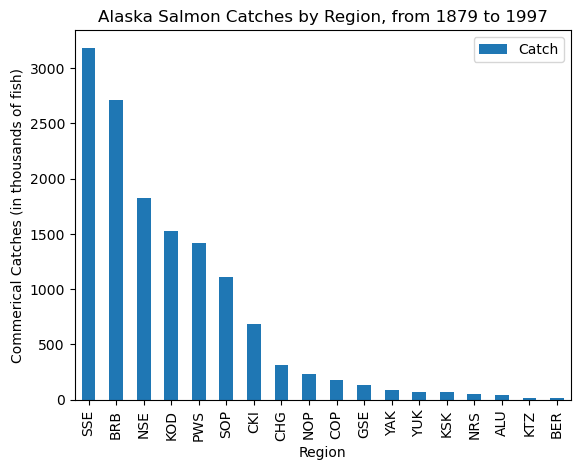

In [140]:
avg_region.sort_values('Catch', ascending = False).plot(kind = "bar",
                                                       title = "Alaska Salmon Catches by Region, from 1879 to 1997",
                                                       ylabel = "Commerical Catches (in thousands of fish)")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()